In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv('All_Pokemon.csv', index_col='Number')


### Información resumida

In [193]:
df.describe()

,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,...,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,69.930368,80.544487,74.590909,72.908124,72.159574,68.609284,438.742747,73.123791,20.028863,4.431335,...,1.003143,1.239362,1.025629,0.974855,1.075677,0.991538,1.094052,1.287137,71.838491,136.528723
std,26.188367,32.514268,30.885981,32.764971,27.603097,30.225102,120.577842,20.096307,10.819824,2.265449,...,0.613302,0.698763,0.578387,0.377676,0.475708,0.511592,0.534657,1.390564,132.753724,3108.656552
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,1.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,50.000000,55.250000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.808683,3.000000,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,460.000000,76.666667,18.531071,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.830537,6.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.425000,42.200000
max,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,8.000000,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


### Consultar y Eliminar Filas Duplicadas

In [194]:
duplicados = df.duplicated().sum()

if duplicados > 0:
    print(f'Existían {duplicados} filas duplicadas')
    df.drop_duplicates(inplace=True)
    print('Se eliminaron las filas duplicadas')
    datos_sin_duplicados = df
else:
    print('No existían filas duplicadas')



Existían 2 filas duplicadas
Se eliminaron las filas duplicadas


### Eliminando nulos

Identificar nulos

In [195]:
nulos_columnas = datos_sin_duplicados.isnull().sum()
nulos_columnas
nulos_filas = datos_sin_duplicados[datos_sin_duplicados.isnull().any(axis=1)]
nulos_filas

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
Number,,,,,,,,,,,,,,,,,,,,,
4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
5,Charmeleon,Fire,NaN,"['Blaze', 'Solar Power']",58,64,58,80,65,80,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.0,15.7
7,Squirtle,Water,NaN,"['Rain Dish', 'Torrent']",44,48,65,50,64,43,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.5,9.0,36.0
8,Wartortle,Water,NaN,"['Rain Dish', 'Torrent']",59,63,80,65,80,58,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,22.5,22.5
9,Blastoise,Water,NaN,"['Rain Dish', 'Torrent']",79,83,100,85,105,78,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.6,85.5,33.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,Kubfu,Fighting,NaN,['Inner Focus'],60,90,60,53,50,72,...,0.5,0.5,1.0,1.0,0.5,1.0,2.0,0.6,12.0,33.3
894,Regieleki,Electric,NaN,['Transistor'],80,100,50,100,50,200,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.2,145.0,100.7
895,Regidrago,Dragon,NaN,"[""Dragon's Maw""]",200,100,50,100,50,80,...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.1,200.0,45.4


Eliminar Nulos

In [196]:
datos_sin_nulos = datos_sin_duplicados.dropna()


### Filtrando los de elemento de fuego

In [197]:
def filtro_fuego(tipo):
    return 'Fire' in tipo

tipos_fuego = datos_sin_nulos[datos_sin_nulos['Type 1'].apply(filtro_fuego)]
tipos_fuego_fil = tipos_fuego.head(20)
tipos_fuego_fil
    

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
Number,,,,,,,,,,,,,,,,,,,,,
6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,100,...,0.25,4.0,1.0,1.0,1.0,0.50,0.50,1.7,90.5,31.3
6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,100,...,0.25,4.0,1.0,1.0,1.0,0.50,0.50,1.7,100.5,34.8
6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,100,...,0.50,2.0,1.0,2.0,1.0,0.50,1.00,1.7,110.5,38.2
105,Alolan Marowak,Fire,Ghost,"['Cursed Body', 'Rock Head']",60,80,110,50,80,45,...,0.25,2.0,2.0,1.0,2.0,0.50,0.50,1.0,34.0,34.0
146,Moltres,Fire,Flying,"['Flame Body', 'Pressure']",90,100,90,125,85,90,...,0.25,4.0,1.0,1.0,1.0,0.50,0.50,2.0,60.0,15.0
219,Magcargo,Fire,Rock,"['Flame Body', 'Magma Armor', 'Weak Armor']",60,50,120,90,80,30,...,0.50,2.0,1.0,1.0,1.0,1.00,0.50,0.8,55.0,85.9
250,Ho-Oh,Fire,Flying,"['Pressure', 'Regenerator']",106,130,90,110,154,90,...,0.25,4.0,1.0,1.0,1.0,0.50,0.50,3.8,199.0,13.8
256,Combusken,Fire,Fighting,"['Blaze', 'Speed Boost']",60,85,60,85,60,55,...,0.25,1.0,1.0,1.0,0.5,0.50,1.00,0.9,19.5,24.1
257,Blaziken,Fire,Fighting,"['Blaze', 'Speed Boost']",80,120,70,110,70,80,...,0.25,1.0,1.0,1.0,0.5,0.50,1.00,1.9,52.0,14.4


### Promedio del nivle de Defensa

In [198]:
promedio_defensa = tipos_fuego_fil[['Def']]
promedio_def = promedio_defensa.mean()
promedio_def

Def    81.15
dtype: float64

### Gráfico de barras

### Gráfico de línea

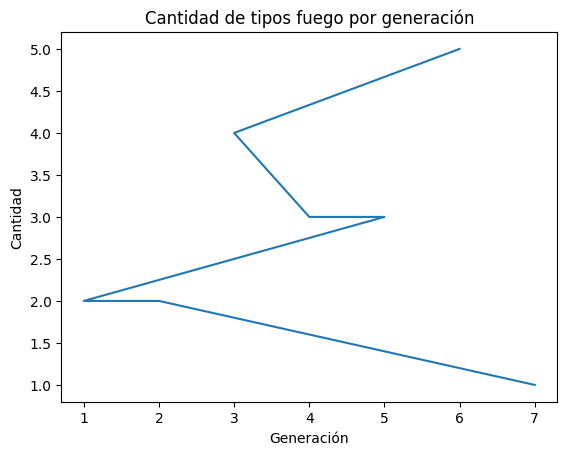

In [ ]:
gen = tipos_fuego_fil['Generation'].value_counts()
plt.plot(gen, label = 'Generación')
plt.xlabel('Generación') 
plt.ylabel('Cantidad')
plt.title('Cantidad de tipos fuego por generación')
plt.show()